# Классификация (Проекты аналитики данных)

### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загружаем данные из csv файла
df_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'target']
df = pd.read_csv('DatasetAdults.csv',delimiter=';', header=None, names= df_names, index_col = False, na_values=' ?')

In [3]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  target  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24279 entries, 0 to 24278
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24279 non-null  int64 
 1   workclass       22919 non-null  object
 2   fnlwgt          24279 non-null  int64 
 3   education       24279 non-null  object
 4   education-num   24279 non-null  int64 
 5   marital-status  24279 non-null  object
 6   occupation      22914 non-null  object
 7   relationship    24279 non-null  object
 8   race            24279 non-null  object
 9   sex             24279 non-null  object
 10  capital-gain    24279 non-null  int64 
 11  capital-loss    24279 non-null  int64 
 12  hours-per-week  24279 non-null  int64 
 13  native-country  23848 non-null  object
 14  target          24279 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


In [5]:
# Статистические показатели количественных переменных
round(df.describe(),2)

age      fnlwgt  education-num  capital-gain  capital-loss  \
count  24279.00    24279.00       24279.00      24279.00      24279.00   
mean      38.60   189919.29          10.08       1076.75         85.93   
std       13.69   105489.59           2.56       7396.91        400.02   
min       17.00    12285.00           1.00          0.00          0.00   
25%       28.00   117992.00           9.00          0.00          0.00   
50%       37.00   178469.00          10.00          0.00          0.00   
75%       48.00   237453.50          12.00          0.00          0.00   
max       90.00  1484705.00          16.00      99999.00       4356.00   

       hours-per-week  
count        24279.00  
mean            40.41  
std             12.31  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00

In [6]:
# Статистика по категориальным признакам
for column in df.select_dtypes(include=['object']):
    print(f"\nValue for '{column}':")
    print(df[column].value_counts())


Value for 'workclass':
 Private             16865
 Self-emp-not-inc     1926
 Local-gov            1586
 State-gov             962
 Self-emp-inc          833
 Federal-gov           734
 Without-pay             8
 Never-worked            5
Name: workclass, dtype: int64

Value for 'education':
 HS-grad         7881
 Some-college    5433
 Bachelors       4019
 Masters         1274
 Assoc-voc       1038
 11th             882
 Assoc-acdm       771
 10th             699
 7th-8th          477
 Prof-school      416
 9th              376
 12th             313
 Doctorate        305
 5th-6th          243
 1st-4th          118
 Preschool         34
Name: education, dtype: int64

Value for 'marital-status':
 Married-civ-spouse       11118
 Never-married             7987
 Divorced                  3338
 Separated                  752
 Widowed                    746
 Married-spouse-absent      322
 Married-AF-spouse           16
Name: marital-status, dtype: int64

Value for 'occupation':
 Prof-speci

In [7]:
# Удаляем NA строки
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna()

In [8]:
# Конвертируем значения в столбце 'target' в числовой формат с помощью .loc
df_cleaned.loc[:, 'target'] = df_cleaned['target'].map({' <=50K': 0, ' >50K': 1}).astype(int)

### Pair-plot

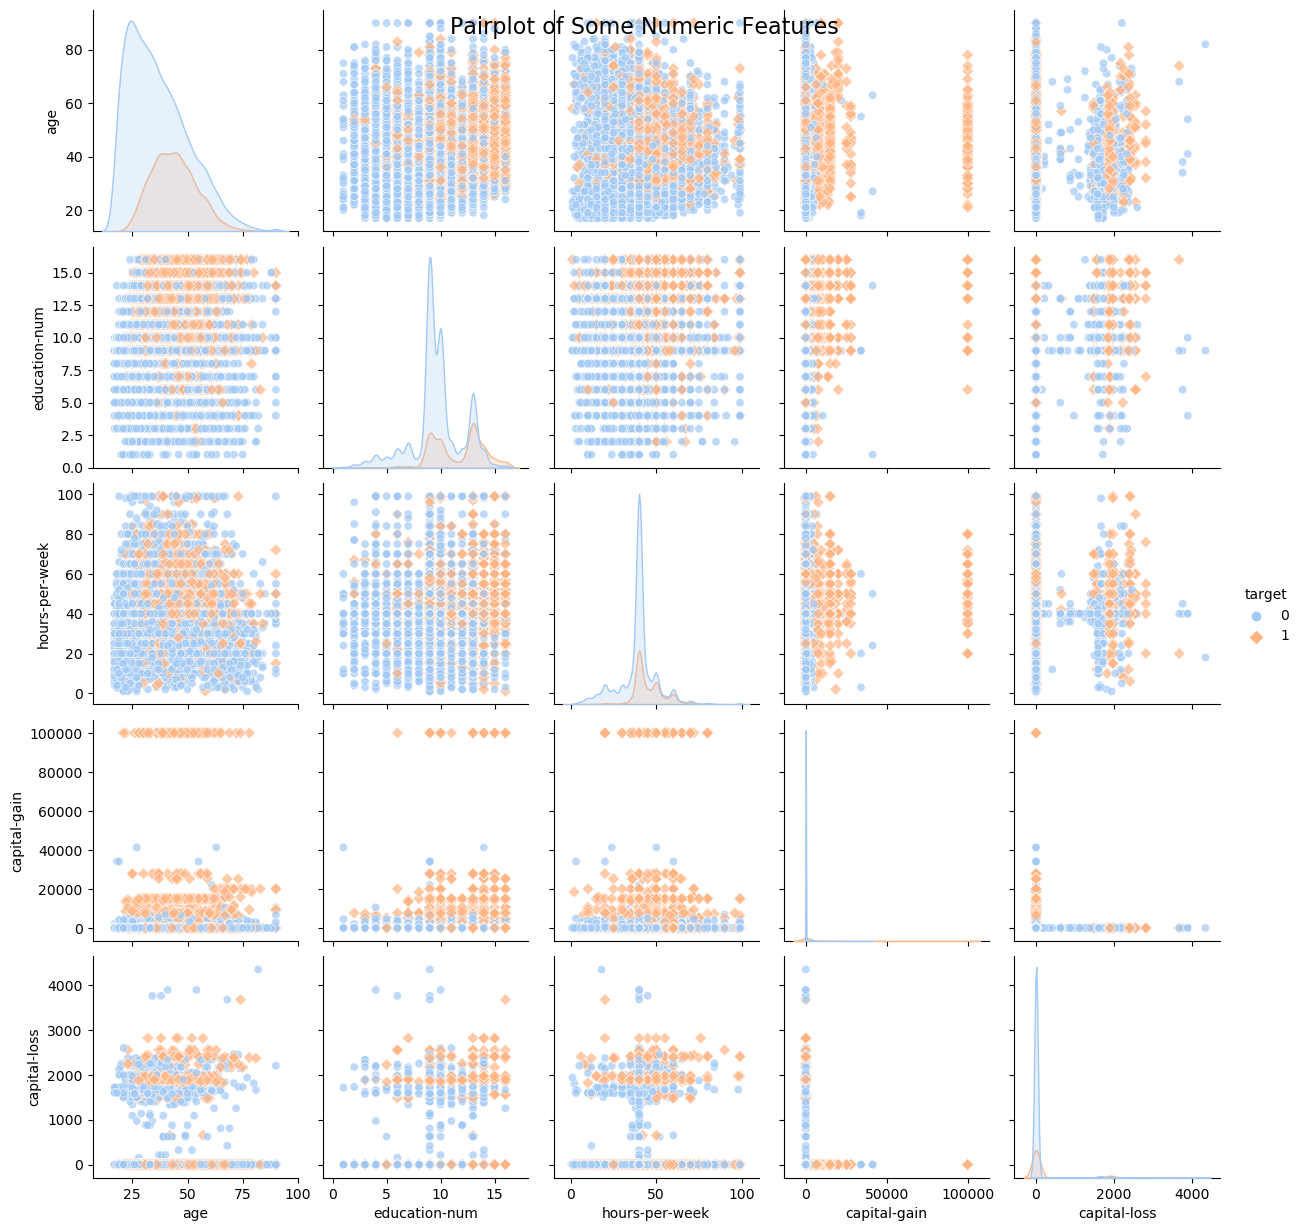

In [9]:
sns.pairplot(df_cleaned, hue='target', vars=['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'],
             markers=["o", "D"], plot_kws={'alpha': 0.7}, diag_kind='kde', palette='pastel')

plt.suptitle('Pairplot of Some Numeric Features', size=16)
plt.show()

### Box-plot

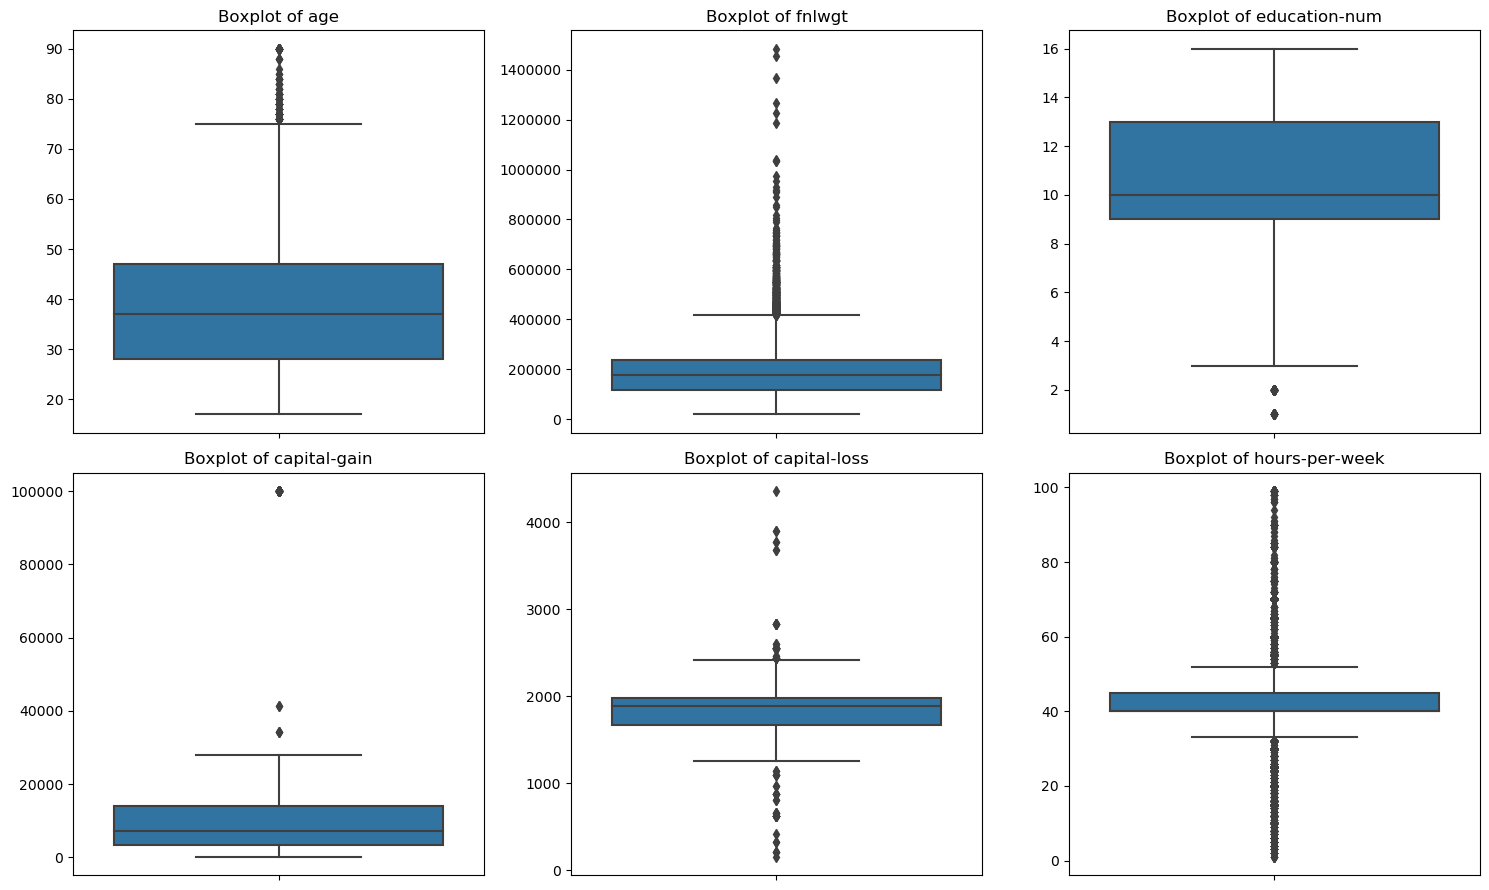

In [10]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

fig, axs = plt.subplots(2, 3, figsize=(15, 9))

axs = axs.flatten()

# Итерация по числовым столбцам и создание боксплотов
for i, column in enumerate(numeric_columns[:6]):
    if i in [3, 4]:  # Если это 3-й или 4-й боксплот, исключаем значения 0
        sns.boxplot(y=df_cleaned[df_cleaned[column] != 0][column], ax=axs[i])
    else:
        sns.boxplot(y=df_cleaned[column], ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel('')

plt.tight_layout()
plt.show()

### Корреляционная матрица

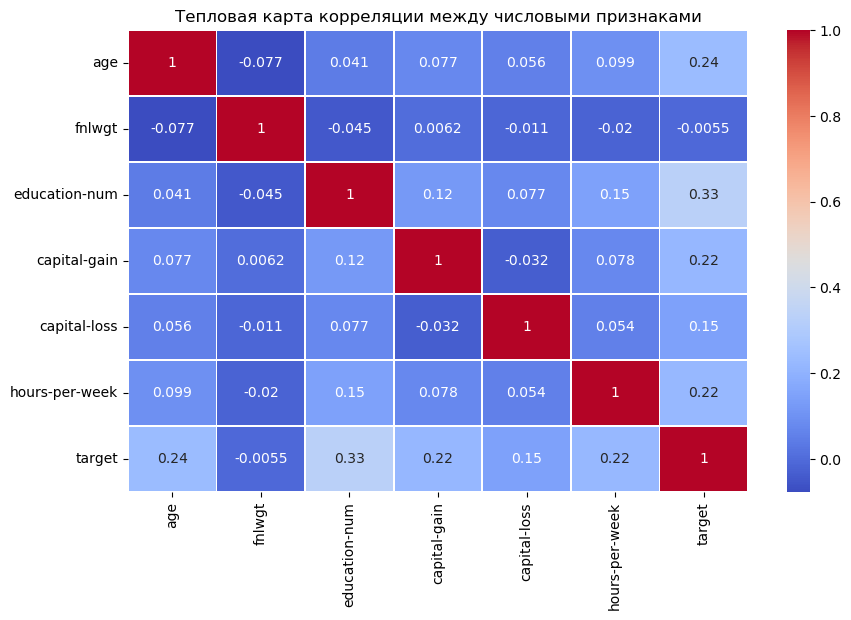

In [11]:
# Вычисляем корреляционную матрицу только для числовых столбцов
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Устанавливаем размер графика
plt.figure(figsize=(10, 6))

# Создаем тепловую карту
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)

# Добавляем заголовок и отображаем график
plt.title('Тепловая карта корреляции между числовыми признаками')
plt.show()

## KNN

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Выделяем целевую переменную
Y = df_cleaned['target']
X = df_cleaned.drop(columns='target')

В датасете ярко выраженный дисбаланс классов, поэтому будем оценивать модель по F1-мере и AUC-ROC.

In [14]:
Y.value_counts()

0    16938
1     5565
Name: target, dtype: int64

In [15]:
# Определяем категориальные и числовые переменные
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
# Создаем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [17]:
# Создаем конвейер
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=1))
])

In [18]:
# Разделяем данные на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Кросс-валидация

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# Инициализация списков для сохранения результатов
k_values = range(1, 50)
sc = []
test_sc = []  
precision_vals_train = []
recall_vals_train = []
f1_vals_train = []
precision_vals_test = []
recall_vals_test = []
f1_vals_test = []

# Определение KFold
fold = KFold(n_splits=5, shuffle=True, random_state=42)

for i in k_values:
    # Обновляем модель в конвейере
    pipeline.named_steps['classifier'].n_neighbors = i
    
    # Кросс-валидация
    scores = cross_val_score(estimator=pipeline, X=X_train, y=Y_train, cv=fold)
    sc.append(scores.mean())
    
    # Обучение на тренировочных данных и оценка на тестовой выборке
    pipeline.fit(X_train, Y_train)
    train_predictions = pipeline.predict(X_train)
    test_predictions = pipeline.predict(X_test)
    
    # Расчет метрик
    precision_vals_train.append(precision_score(Y_train, train_predictions))
    recall_vals_train.append(recall_score(Y_train, train_predictions))
    f1_vals_train.append(f1_score(Y_train, train_predictions))
    precision_vals_test.append(precision_score(Y_test, test_predictions))
    recall_vals_test.append(recall_score(Y_test, test_predictions))
    f1_vals_test.append(f1_score(Y_test, test_predictions))
    test_sc.append(accuracy_score(Y_test, test_predictions))

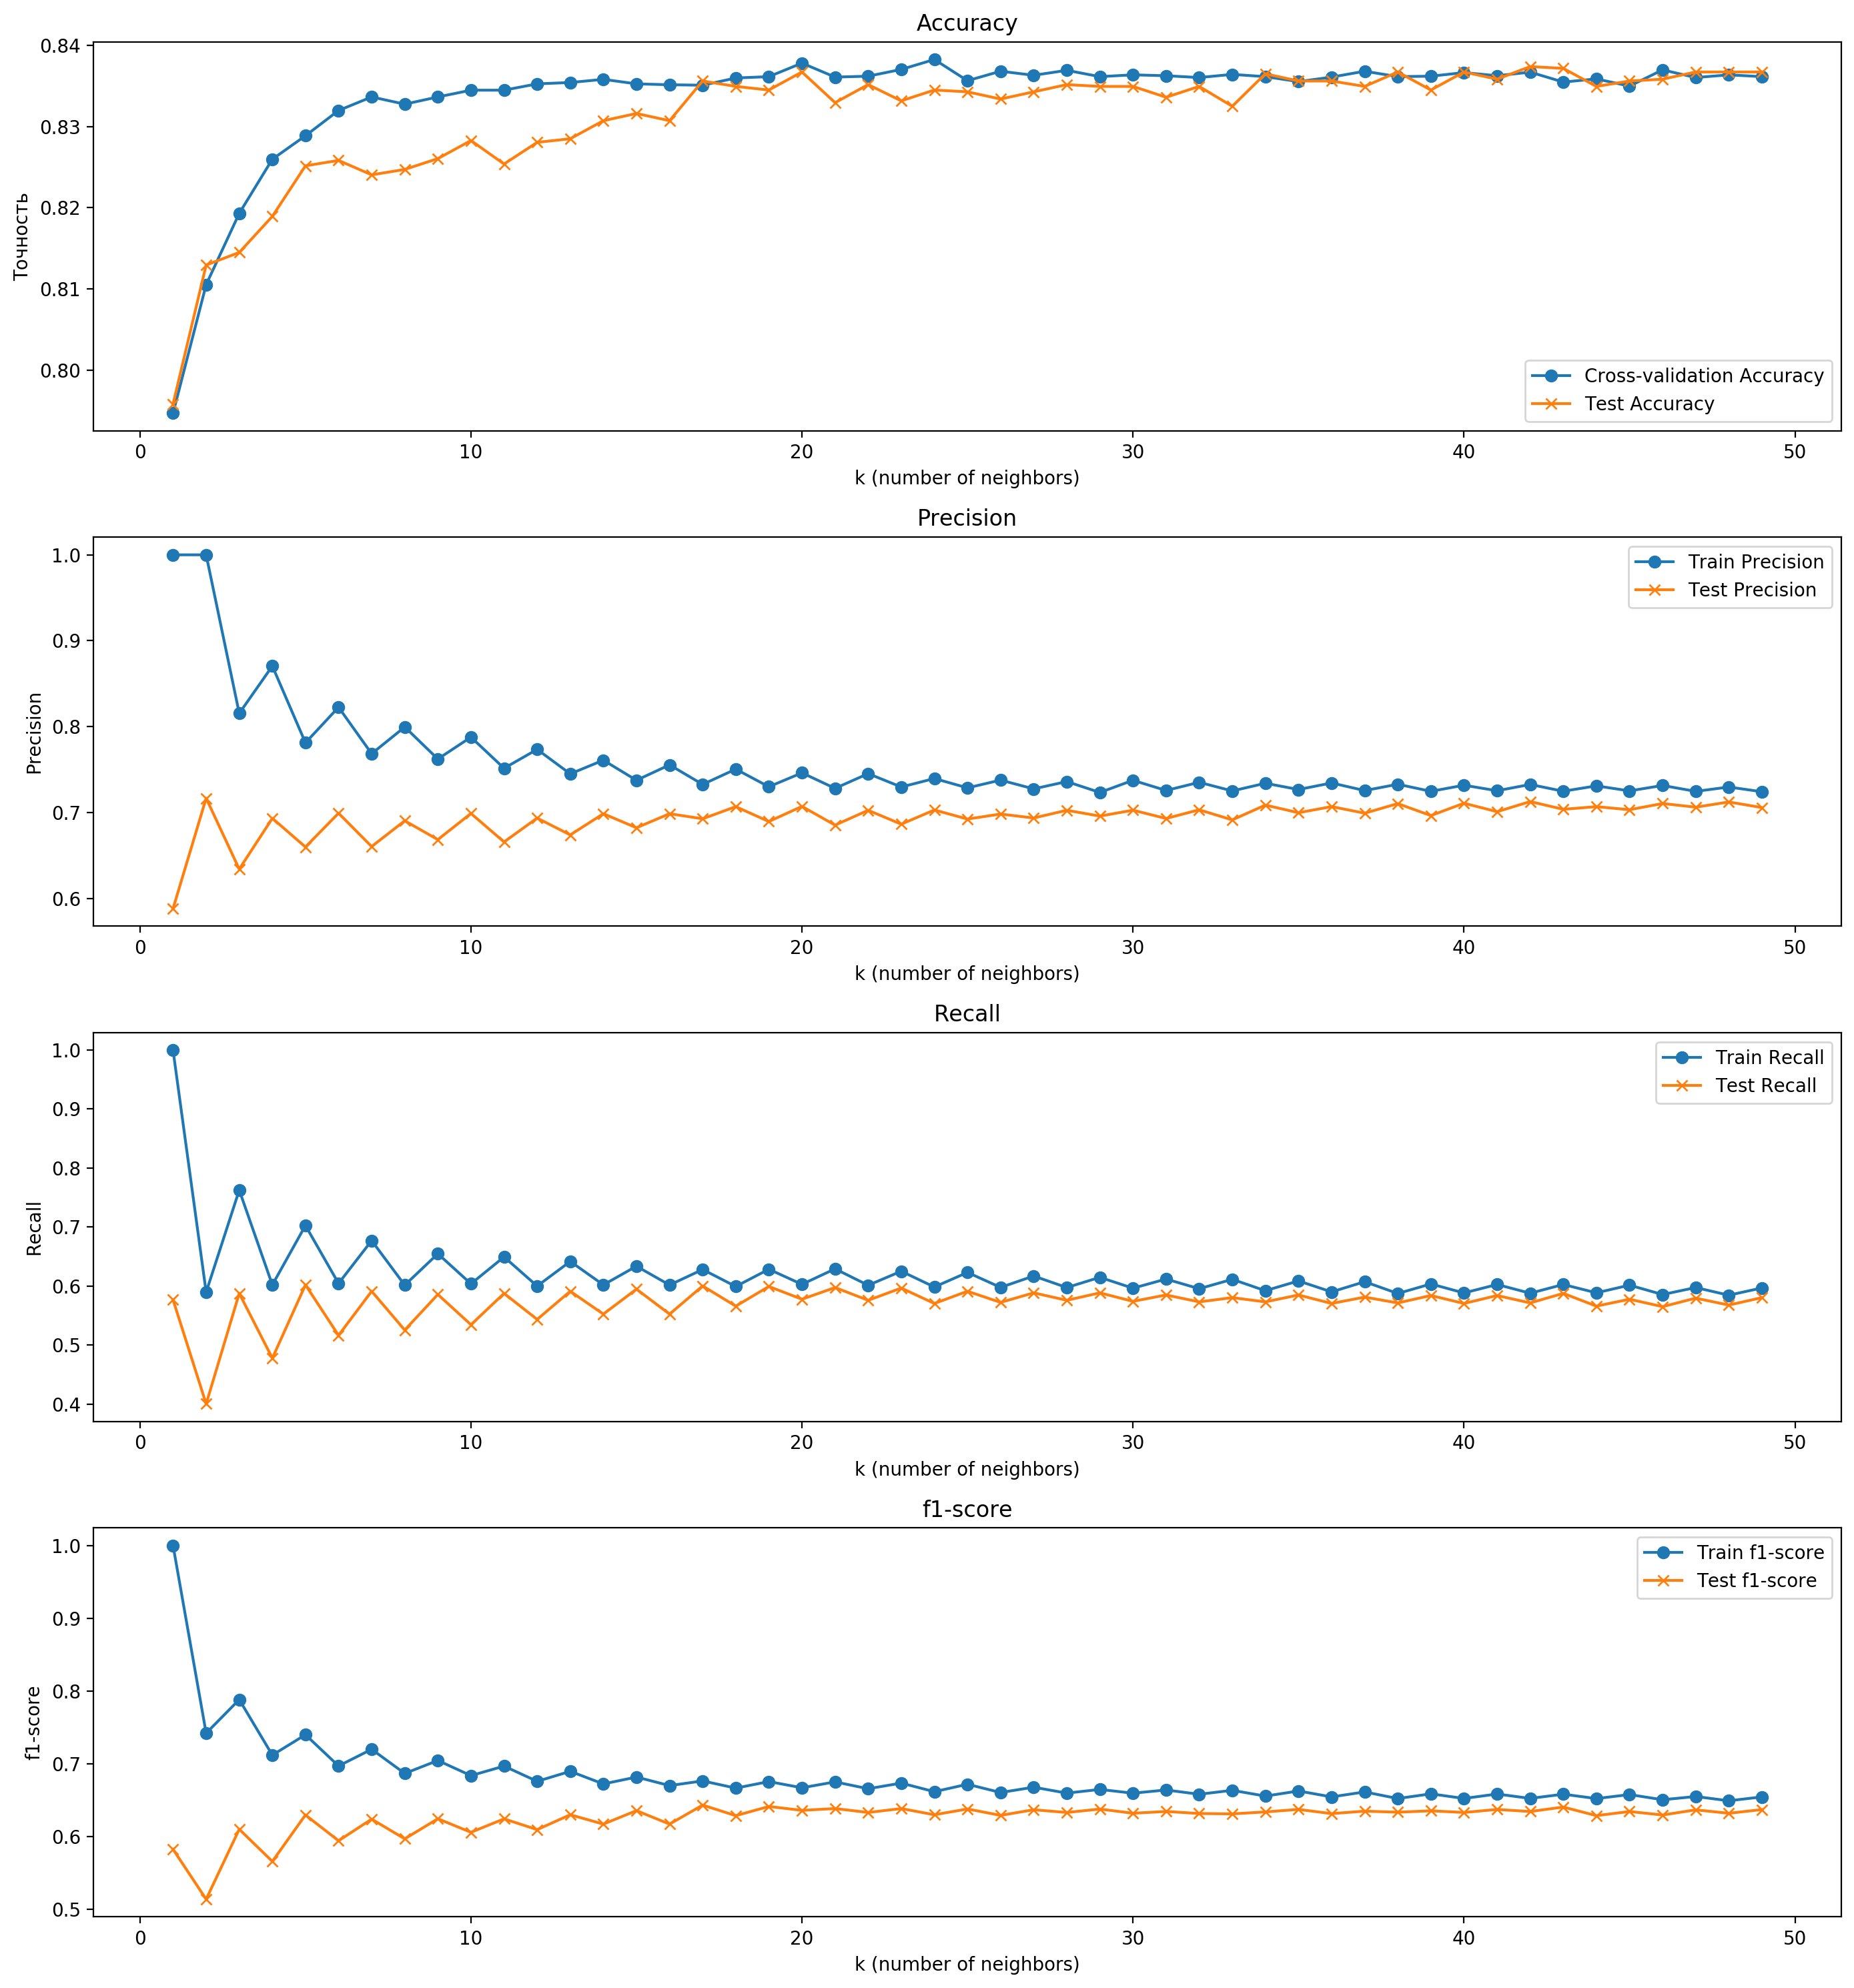

In [21]:
plt.figure(figsize=(14, 15), dpi=200)

# Точность
plt.subplot(4, 1, 1)
plt.plot(k_values, sc, marker='o', label='Cross-validation Accuracy')
plt.plot(k_values, test_sc, marker='x', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Точность')
plt.legend()

# Precision
plt.subplot(4, 1, 2)
plt.plot(k_values, precision_vals_train, marker='o', label='Train Precision')
plt.plot(k_values, precision_vals_test, marker='x', label='Test Precision')
plt.title('Precision')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(4, 1, 3)
plt.plot(k_values, recall_vals_train, marker='o', label='Train Recall')
plt.plot(k_values, recall_vals_test, marker='x', label='Test Recall')
plt.title('Recall')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(k_values, f1_vals_train, marker='o', label='Train f1-score')
plt.plot(k_values, f1_vals_test, marker='x', label='Test f1-score')
plt.title('f1-score')
plt.xlabel('k (number of neighbors)')
plt.ylabel('f1-score')
plt.legend()

plt.tight_layout()
plt.show()

### Оптимальное кол-во соседей

Оптимальное кол-во соседей определяем по f1-score т.к у нас наблюдается дисбаланс классов

In [22]:
max_index = max(range(len(f1_vals_test)), key=f1_vals_test.__getitem__) + 1

In [23]:
max_index

17

### ROC-кривая

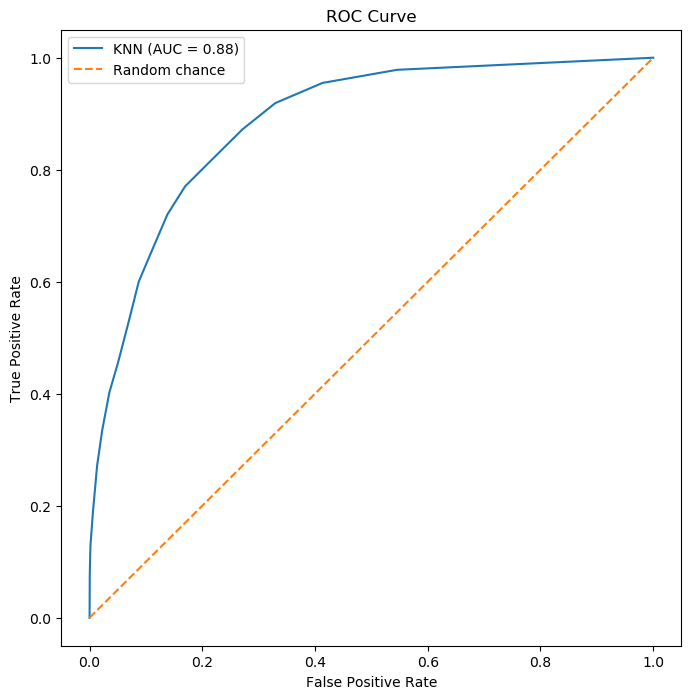

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Установка оптимального количества соседей в KNN равным 17
pipeline.named_steps['classifier'].n_neighbors = max_index

# Обучение модели и предсказание вероятностей
pipeline.fit(X_train, Y_train)
probabilities = pipeline.predict_proba(X_test)[:, 1] # вероятности класса 1

# Вычисление TPR и FPR
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Вычисление AUC
auc_score = roc_auc_score(Y_test, probabilities)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [25]:
print(f'AUC = {round(auc_score, 2)}')

AUC = 0.88


Модель имеет высокую дискриминационную способность, это означает, что в большинстве случаев модель может правильно классифицировать положительные и отрицательные случаи.

### Итоговые результаы модели KNN

#### k = 17

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Метрики для тренировочного набора
accuracy_train = round(accuracy_score(Y_train, train_predictions), 4)
precision_train = round(precision_score(Y_train, train_predictions), 4)
recall_train = round(recall_score(Y_train, train_predictions), 4)
f1_score_train = round(f1_score(Y_train, train_predictions), 4)

# Метрики для тестового набора
accuracy_test = round(accuracy_score(Y_test, test_predictions), 4)
precision_test = round(precision_score(Y_test, test_predictions), 4)
recall_test = round(recall_score(Y_test, test_predictions), 4)
f1_score_test = round(f1_score(Y_test, test_predictions), 4)

# Вывод результатов
print("Train:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

print("\nTest:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")


Train:
Accuracy: 0.844
Precision: 0.7241
Recall: 0.597
F1 Score: 0.6544

Test:
Accuracy: 0.8367
Precision: 0.7057
Recall: 0.5806
F1 Score: 0.637


### Confusion Matrix

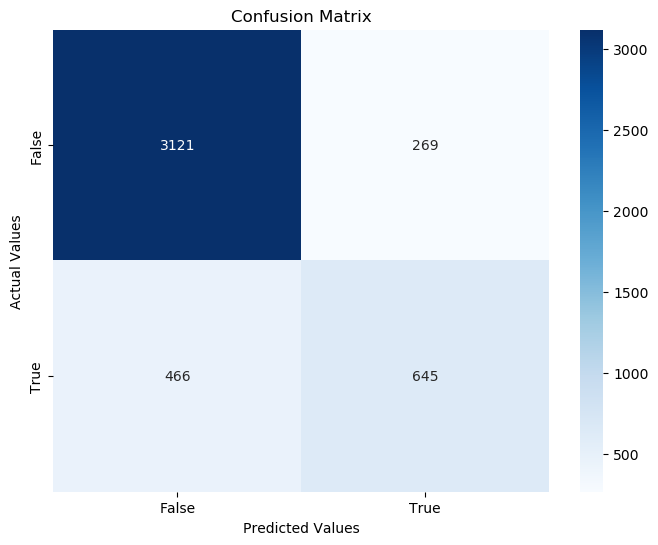

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Создание матрицы ошибок
cf_matrix = confusion_matrix(Y_test, test_predictions)

# Визуализация матрицы ошибок с помощью seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Axis labels
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
report_1 = classification_report(Y_test, test_predictions)

In [30]:
print(report_1)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3390
           1       0.71      0.58      0.64      1111

    accuracy                           0.84      4501
   macro avg       0.79      0.75      0.77      4501
weighted avg       0.83      0.84      0.83      4501



## Decision Tree

In [31]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse import hstack

In [32]:
# Разделяем данные
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

### Стандартизация (отдельно стандартизиурем train и test)

In [33]:
# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_num_scaled = scaler.transform(X_test[numeric_features])

In [34]:
# Преобразование категориальных признаков
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

In [35]:
# Объединение обработанных данных
X_train_processed = hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_processed = hstack((X_test_num_scaled, X_test_cat_encoded))

### Оптимизация гиперпараметров

In [45]:
# Сетка поиска
search_space = {'max_depth': (2, 35), 
                'min_samples_split': (2, 50),
                'min_samples_leaf': (2, 50),
                'ccp_alpha': (0.0, 0.002)
}

In [46]:
# Инициализация модели
dtree = DecisionTreeClassifier()

In [64]:
# Инициализация BayesSearchCV
bayes_search = BayesSearchCV(dtree, search_space, n_iter=300, scoring='f1', n_jobs=-1, cv=5)

In [65]:
# Запуск оптимизации
bayes_search.fit(X_train_processed, Y_train)

C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\

C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\

C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\

C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\whati\

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=300, n_jobs=-1,
              scoring='f1',
              search_spaces={'ccp_alpha': (0.0, 0.002), 'max_depth': (2, 35),
                             'min_samples_leaf': (2, 50),
                             'min_samples_split': (2, 50)})

In [69]:
from sklearn.metrics import f1_score

In [70]:
print(f"Лучший результат на тренировочных данных: f1-score: {bayes_search.best_score_}")
print(f"Лучшие параметры: {bayes_search.best_params_}")

# Оценка на тестовом наборе
best_model = bayes_search.best_estimator_
test_predictions = best_model.predict(X_test_processed)
f1_score_test = f1_score(Y_test, test_predictions, pos_label=1)
print(f"f1-score на тестовых данных: {f1_score_test}")

Лучший результат на тренировочных данных: f1-score: 0.6636692799698102
Лучшие параметры: OrderedDict([('ccp_alpha', 0.0), ('max_depth', 8), ('min_samples_leaf', 17), ('min_samples_split', 8)])
f1-score на тестовых данных: 0.647332988089073


### Изменение f1 score  в зависимости от итераций оптимизации

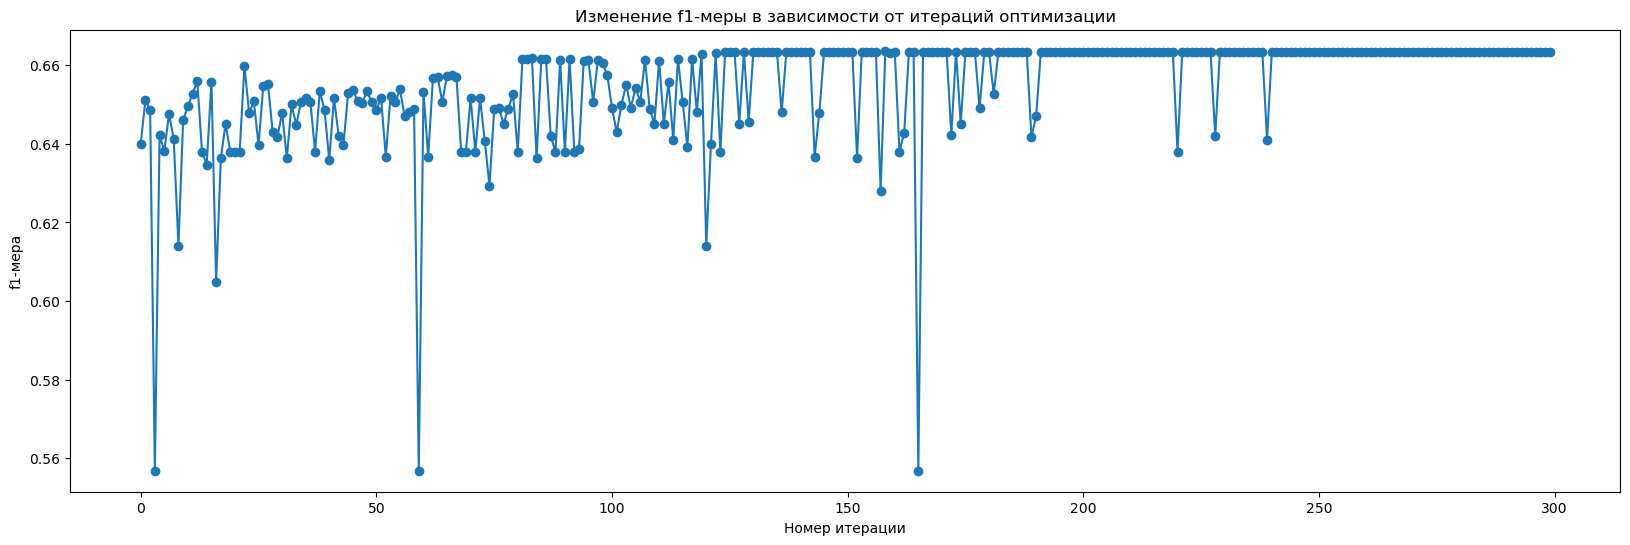

In [131]:
import matplotlib.pyplot as plt

mean_scores = bayes_search.cv_results_['mean_test_score']

plt.figure(figsize=(20, 6))
plt.plot(mean_scores, marker='o')
plt.xlabel('Номер итерации')
plt.ylabel('f1-мера')
plt.title('Изменение f1-меры в зависимости от итераций оптимизации')
plt.show()

### Визуализация результатов байесовского поиска

In [85]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective, plot_histogram

<Figure size 1400x1400 with 0 Axes>

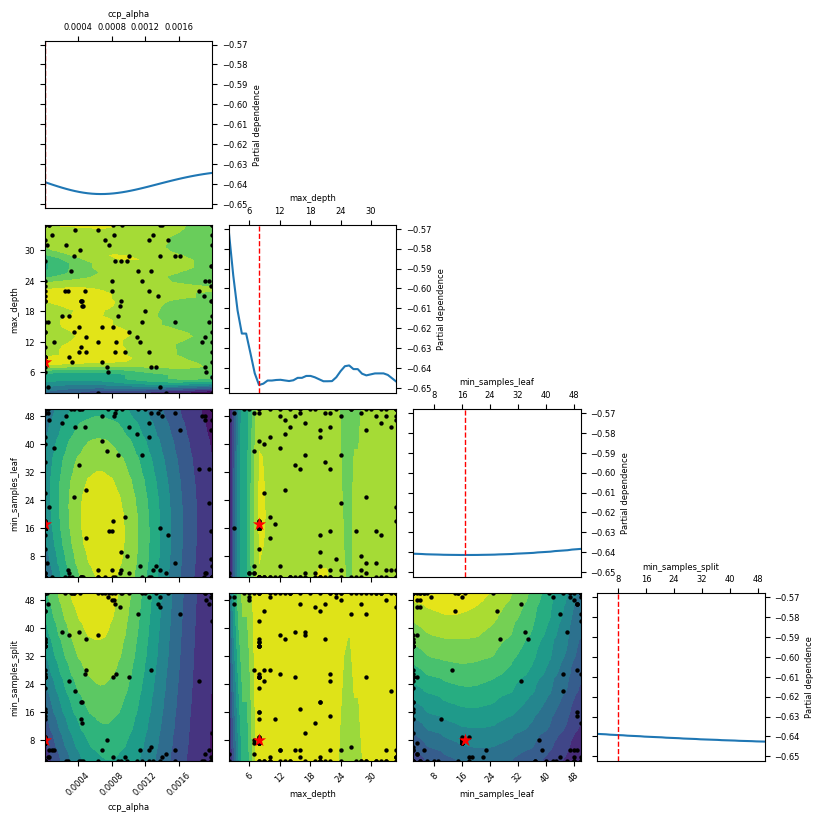

In [92]:
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 6})
plot_objective(bayes_search.optimizer_results_[0])
plt.show()

### Строим финальную модель с оптимальными гиперпараметрами

#### ccp_alpha=0, max_depth=8, min_samples_leaf=17,  min_samples_split=8

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Извлечение названий переменных и таргета
feature_names = df_cleaned.columns.drop('target')  
target_names = 'target'  

# Создание модели с оптимальными параметрами
optimal_dtree = DecisionTreeClassifier(
    ccp_alpha= 0,
    max_depth=8,
    min_samples_leaf=17,
    min_samples_split=8
)

# Обучение модели
optimal_dtree.fit(X_train_processed, Y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=8, min_samples_leaf=17,
                       min_samples_split=8)

In [37]:
# Расчет предсказаний для обучающего и тестового наборов данных
train_predictions = optimal_dtree.predict(X_train_processed)
test_predictions = optimal_dtree.predict(X_test_processed)

# Метрики для тренировочного набора
accuracy_train = round(accuracy_score(Y_train, train_predictions), 4)
precision_train = round(precision_score(Y_train, train_predictions, pos_label=1), 4)
recall_train = round(recall_score(Y_train, train_predictions, pos_label=1), 4)
f1_score_train = round(f1_score(Y_train, train_predictions, pos_label=1), 4)

# Метрики для тестового набора
accuracy_test = round(accuracy_score(Y_test, test_predictions), 4)
precision_test = round(precision_score(Y_test, test_predictions, pos_label=1), 4)
recall_test = round(recall_score(Y_test, test_predictions, pos_label=1), 4)
f1_score_test = round(f1_score(Y_test, test_predictions, pos_label=1), 4)

# Вывод результатов
print("Train:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

print("\nTest:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")

Train:
Accuracy: 0.858
Precision: 0.7882
Recall: 0.5824
F1 Score: 0.6699

Test:
Accuracy: 0.8487
Precision: 0.7622
Recall: 0.5626
F1 Score: 0.6473


In [38]:
report_2 = classification_report(Y_test, test_predictions)

In [39]:
print(report_2)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3390
           1       0.76      0.56      0.65      1111

    accuracy                           0.85      4501
   macro avg       0.82      0.75      0.78      4501
weighted avg       0.84      0.85      0.84      4501



Получаем более хороший результат как по f1 мере так и по Accuracy

### Confusion Matrix

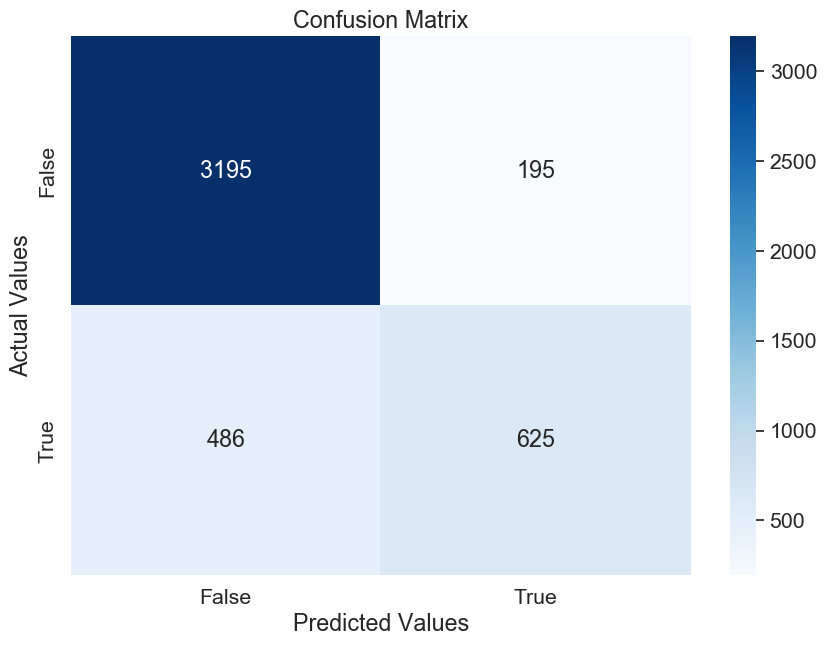

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Расчет матрицы ошибок для тестового набора данных
cf_matrix = confusion_matrix(Y_test, test_predictions)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Увеличение шрифта для наглядности
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # fmt='g' для предотвращения научной нотации

# Настройка меток осей
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')

# Настройка меток тиков
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### Визуализируем дерево

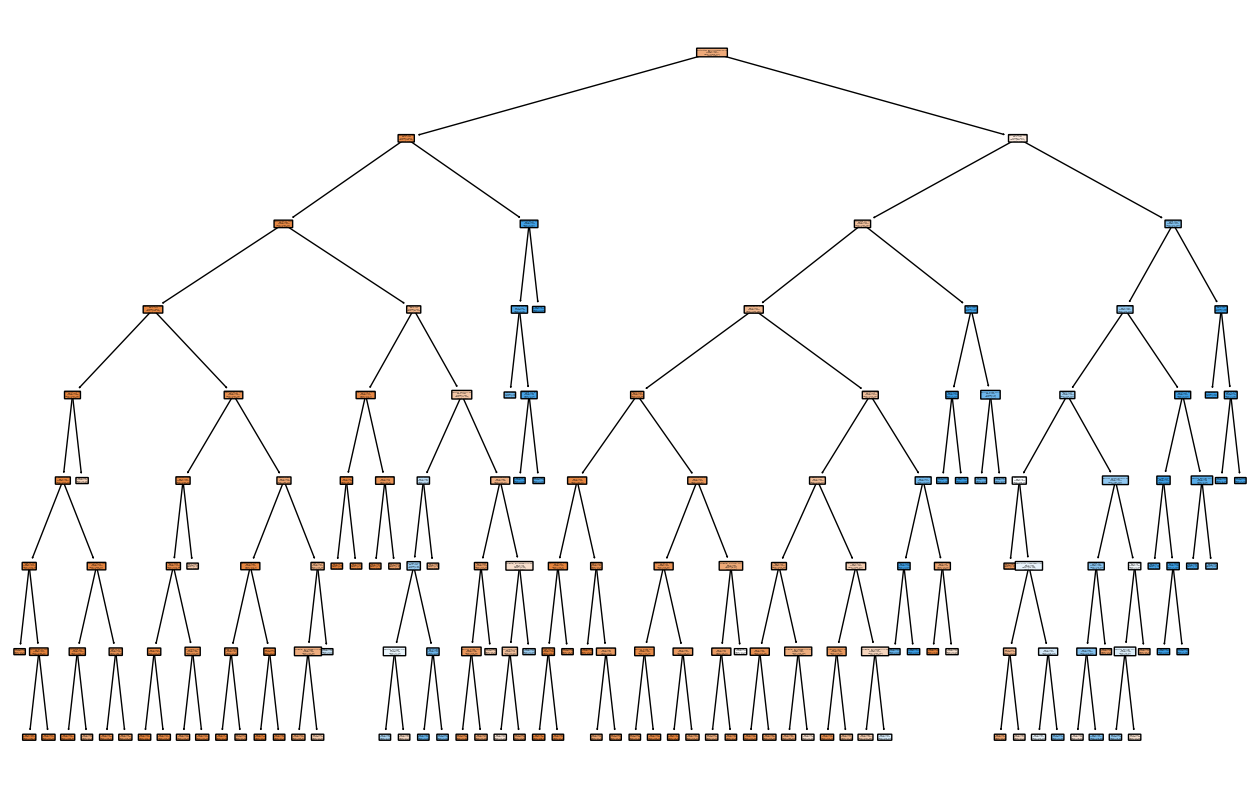

In [116]:
# Числовые признаки
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Названия признаков после One-Hot Encoding для категориальных переменных
encoded_feature_names = encoder.get_feature_names(categorical_features)

# Объединение списков
all_feature_names = numerical_features + list(encoded_feature_names)

plt.figure(figsize=(16,10))
plot_tree(optimal_dtree, 
          filled=True, 
          feature_names=all_feature_names, 
          class_names=['<=50K', '>50K'], 
          rounded=True,
          fontsize=1)
plt.show()

### Первые три уровня дерева

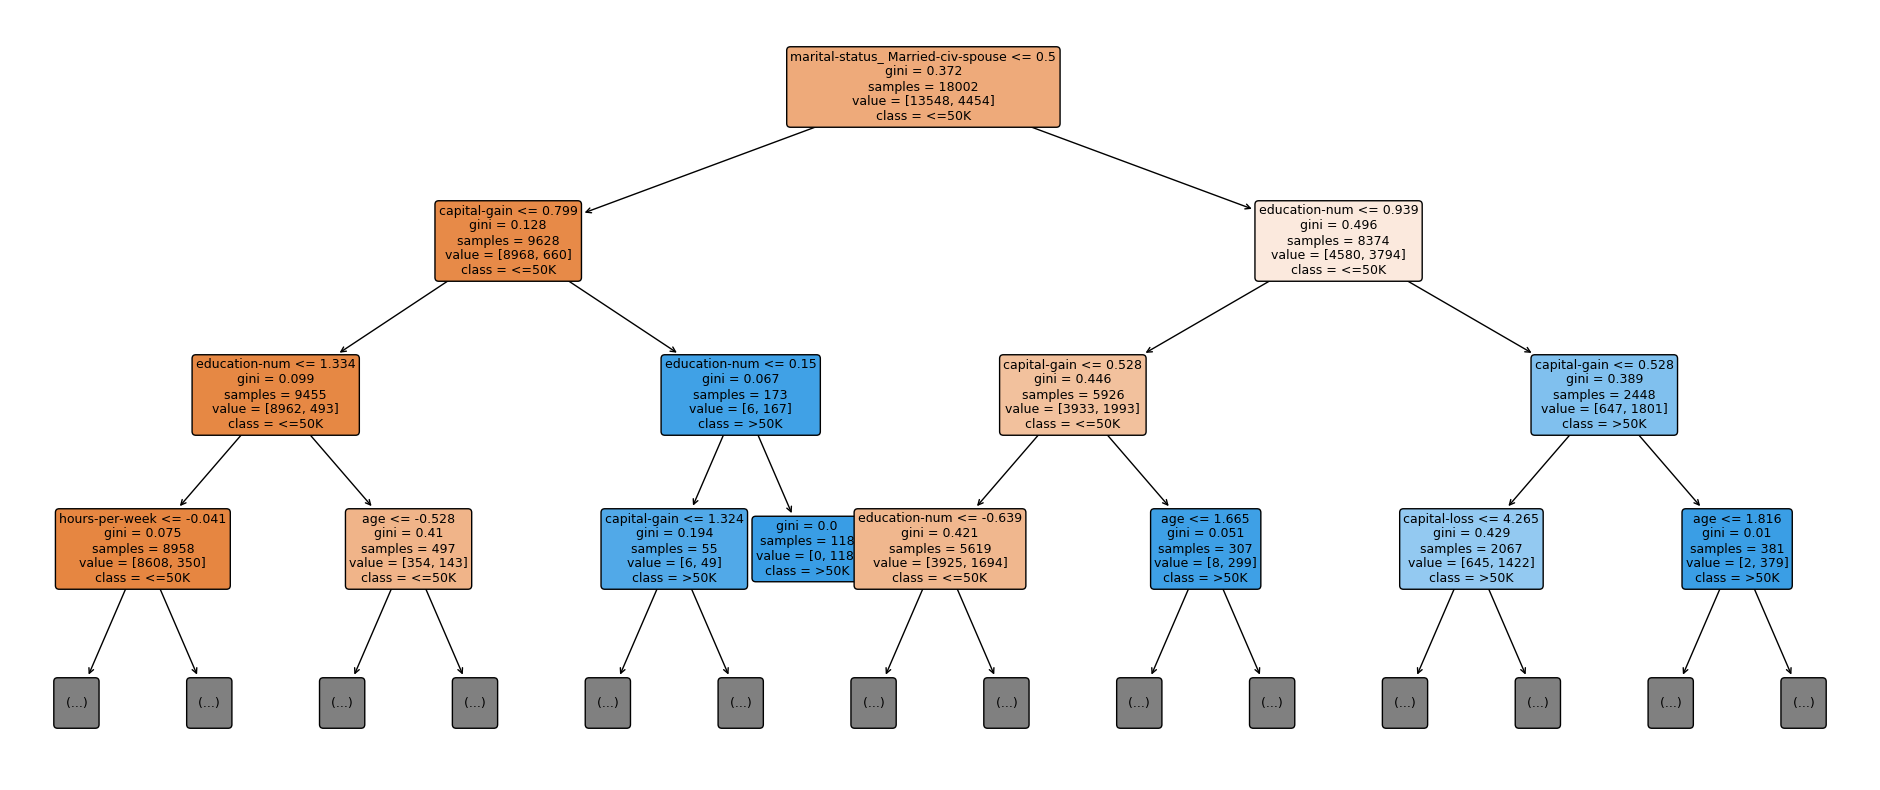

In [115]:
plt.figure(figsize=(24, 10))  
plot_tree(
    optimal_dtree,
    filled=True,
    feature_names=all_feature_names,
    class_names=['<=50K', '>50K'],
    rounded=True,
    max_depth=3,
    fontsize=9,  
)
plt.show()

### Важность признаков (One-hot-endcoding)

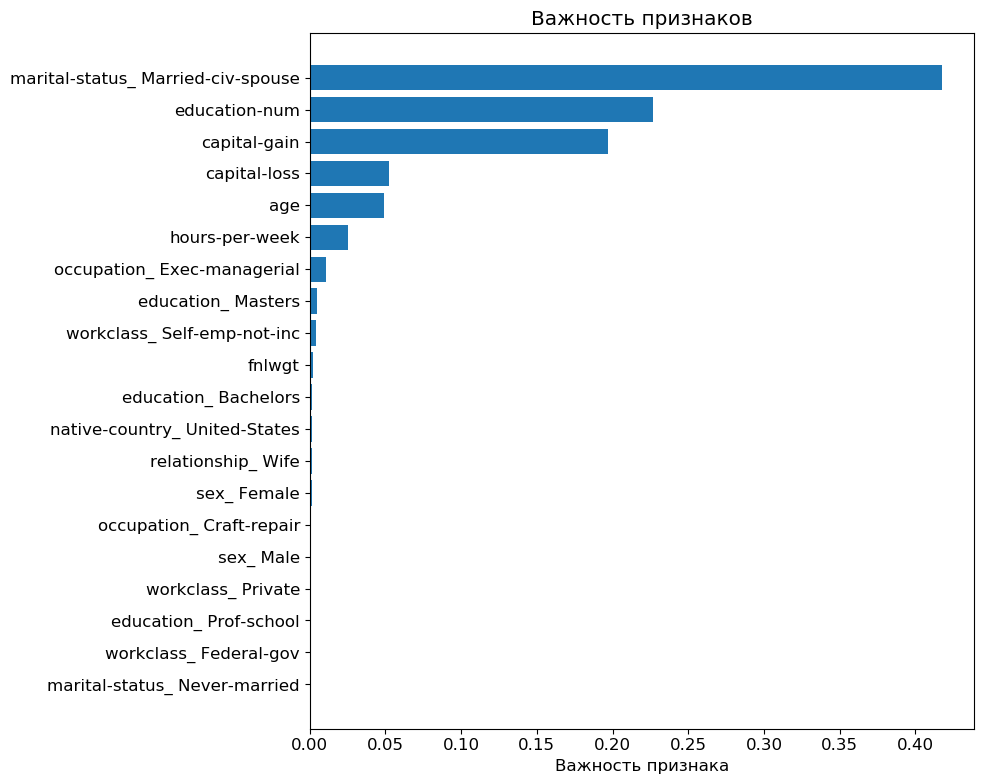

In [128]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 12})

feature_importances = optimal_dtree.feature_importances_
feature_names = all_feature_names  

indices = np.argsort(feature_importances)[::-1]

top_n_features = 20

plt.figure(figsize=(10, 8))
plt.title("Важность признаков".format(top_n_features))
plt.barh(range(top_n_features), feature_importances[indices][:top_n_features], align='center')
plt.yticks(range(top_n_features), np.array(feature_names)[indices][:top_n_features])
plt.gca().invert_yaxis() 
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

### Важность признаков (исходные данные)

(P.S тут просто просуммированны важности по категориям для категориальных признаков)

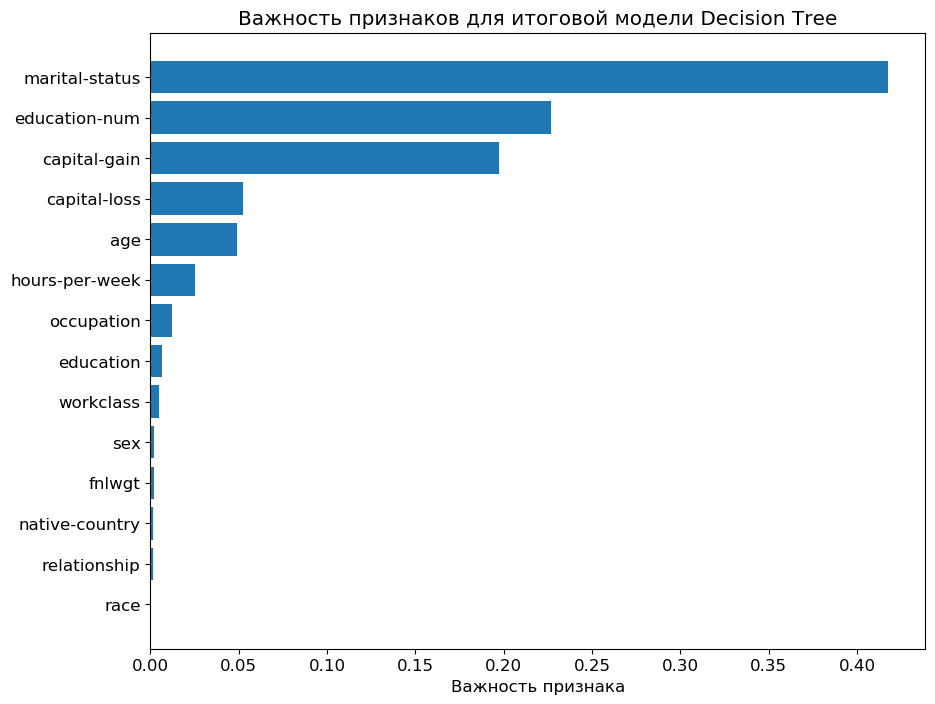

In [127]:
numerical_importances = {feature: importance for feature, importance in zip(numerical_features, feature_importances[:len(numerical_features)])}
category_importances = {category: 0 for category in categorical_features}

# Суммирование важности признаков для каждой категории
for feature, importance in zip(encoded_feature_names, feature_importances[len(numerical_features):]):
    for category in category_importances:
        if feature.startswith(category):
            category_importances[category] += importance
            break

# Объединение словарей
total_importances = {**numerical_importances, **category_importances}

# Сортировка признаков по убыванию важности
sorted_importances = sorted(total_importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Важность признака')
plt.title('Важность признаков для итоговой модели Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

### ROC-кривая

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

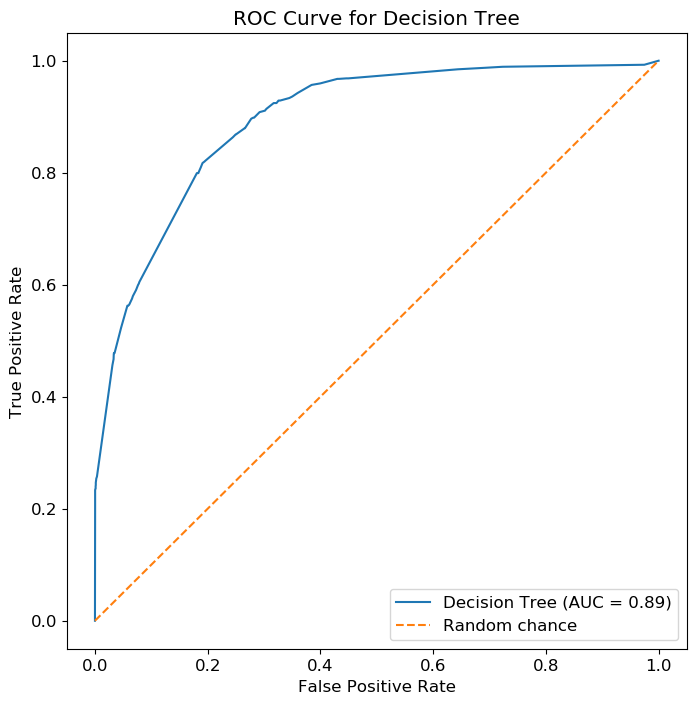

In [129]:
# Получаем вероятности класса 1
probabilities = best_model.predict_proba(X_test_processed)[:, 1]

# Вычисление TPR и FPR
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Вычисление AUC
auc_score = roc_auc_score(Y_test, probabilities)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [132]:
print(f'AUC = {round(auc_score, 2)}')

AUC = 0.89


Результат схож с KNN, но чуточку получше

## Random Forest

### Оптимизация гиперпараметров

In [41]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [33]:
# Сетка поиска
search_space = {
    'n_estimators': (10, 200),  # Количество деревьев в лесу
    'max_depth': (3, 50),       # Максимальная глубина дерева
    'min_samples_split': (2, 25),  # Минимальное количество наблюдений, необходимых для разделения узла
    'min_samples_leaf': (1, 25),   # Минимальное количество наблюдений, требуемых в каждом листовом узле
    'max_features': ('auto', 'sqrt', 'log2'),  # Количество признаков при поиске лучшего разделения
    'bootstrap': [True, False]  # Использовать ли бутстрап-выборки при построении деревьев
}

In [34]:
# Инициализация RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Инициализация BayesSearchCV
bayes_search = BayesSearchCV(rf, search_space, n_iter=100, scoring='f1', cv=5, random_state=0)

# Обучение модели
bayes_search.fit(X_train_processed, Y_train)

# Лучший результат 
best_score = bayes_search.best_score_
best_params = bayes_search.best_params_

C:\Users\whati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [38]:
best_model = bayes_search.best_estimator_
test_predictions = best_model.predict(X_test_processed)
f1_score_test = f1_score(Y_test, test_predictions)

print(f"Лучший результат F1 на тренировочных данных: {best_score}")
print(f"Лучшие гиперпараметры: {best_params}")
print(f"F1-мера на тестовых данных: {f1_score_test}")

Лучший результат F1 на тренировочных данных: 0.6876467697584486
Лучшие гиперпараметры: OrderedDict([('bootstrap', False), ('max_depth', 50), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 25), ('n_estimators', 195)])
F1-мера на тестовых данных: 0.690064260998517


### Изменение f1 score  в зависимости от итераций оптимизации

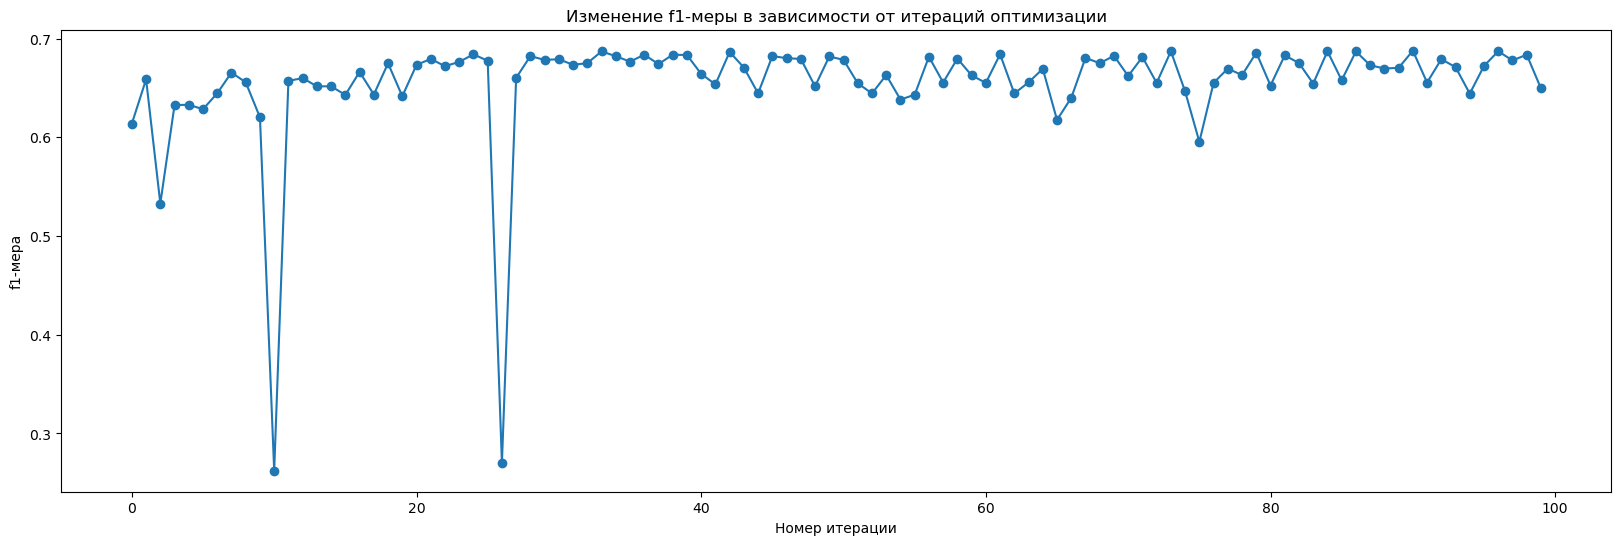

In [39]:
import matplotlib.pyplot as plt

mean_scores = bayes_search.cv_results_['mean_test_score']

plt.figure(figsize=(20, 6))
plt.plot(mean_scores, marker='o')
plt.xlabel('Номер итерации')
plt.ylabel('f1-мера')
plt.title('Изменение f1-меры в зависимости от итераций оптимизации')
plt.show()

### Визуализация результатов байесовского поиска

In [42]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective, plot_histogram

<Figure size 1400x1400 with 0 Axes>

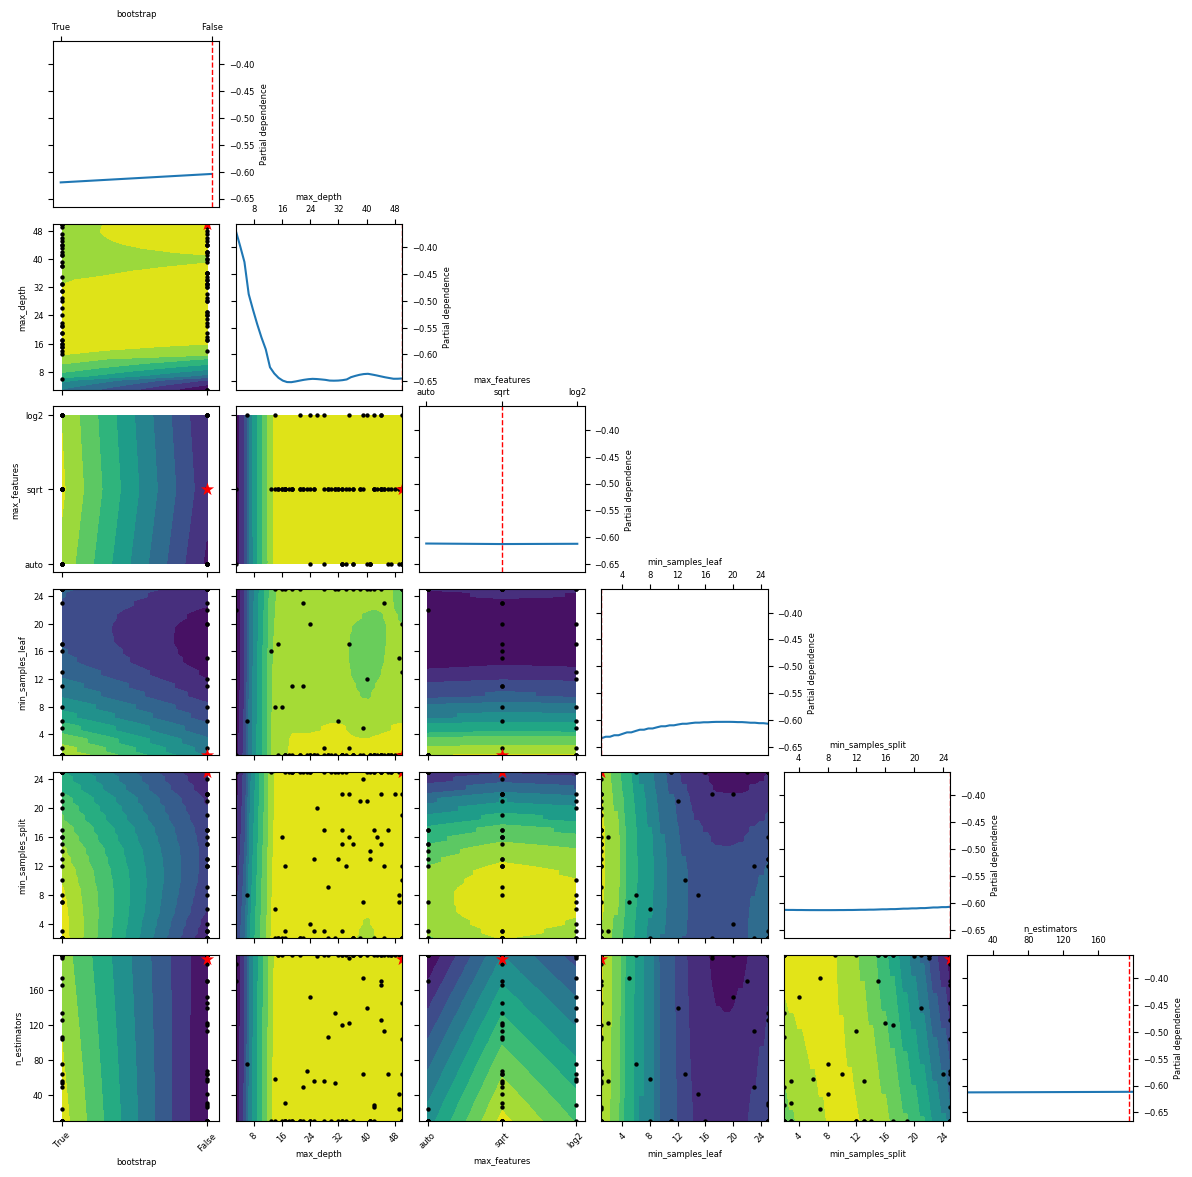

In [44]:
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 6})
plot_objective(bayes_search.optimizer_results_[0])
plt.show()

### Строим финальную модель с оптимальными параметрами

#### bootstrap=False, max_depth=50, max_features='sqrt', min_samples_leaf=1, min_samples_split=25, n_estimators=195, random_state=0 

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimal_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=50,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=25,
    n_estimators=195,
    random_state=0 
)

optimal_rf.fit(X_train_processed, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=25,
                       n_estimators=195, random_state=0)

In [43]:
# Расчет предсказаний для обучающего и тестового наборов данных
train_predictions = optimal_rf.predict(X_train_processed)
test_predictions = optimal_rf.predict(X_test_processed)

# Метрики для тренировочного набора
accuracy_train = round(accuracy_score(Y_train, train_predictions), 4)
precision_train = round(precision_score(Y_train, train_predictions), 4)
recall_train = round(recall_score(Y_train, train_predictions), 4)
f1_score_train = round(f1_score(Y_train, train_predictions), 4)

# Метрики для тестового набора
accuracy_test = round(accuracy_score(Y_test, test_predictions), 4)
precision_test = round(precision_score(Y_test, test_predictions), 4)
recall_test = round(recall_score(Y_test, test_predictions), 4)
f1_score_test = round(f1_score(Y_test, test_predictions), 4)
b
# Вывод результатов
print("Train:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

print("\nTest:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")

Train:
Accuracy: 0.9255
Precision: 0.9023
Recall: 0.7836
F1 Score: 0.8387

Test:
Accuracy: 0.8607
Precision: 0.7654
Recall: 0.6283
F1 Score: 0.6901


In [47]:
report_3 = classification_report(Y_test, test_predictions)

In [49]:
print(report_3)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3390
           1       0.77      0.63      0.69      1111

    accuracy                           0.86      4501
   macro avg       0.83      0.78      0.80      4501
weighted avg       0.86      0.86      0.86      4501



### Confusion Matrix

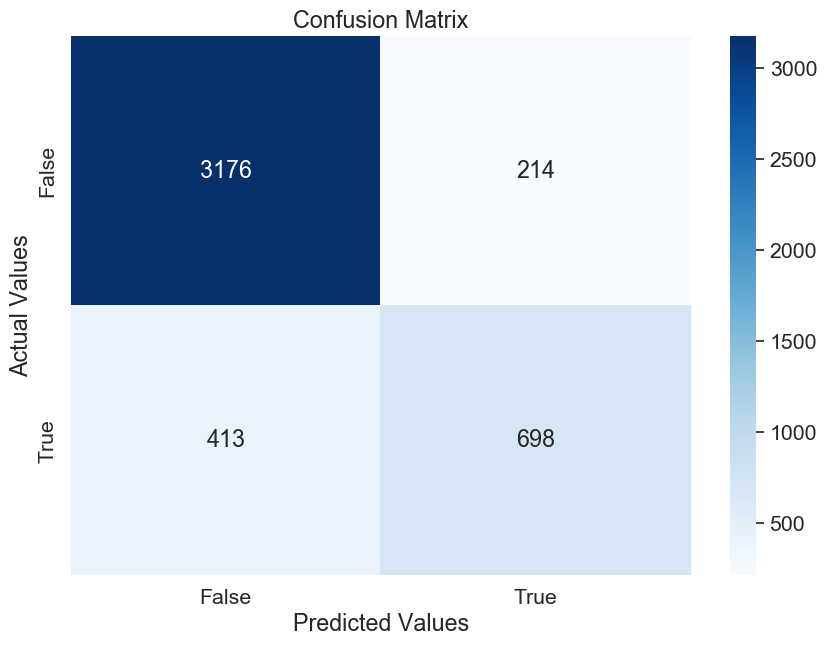

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Расчет матрицы ошибок для тестового набора данных
cf_matrix = confusion_matrix(Y_test, test_predictions)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Увеличение шрифта для наглядности
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # fmt='g' для предотвращения научной нотации

# Настройка меток осей
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')

# Настройка меток тиков
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Данная модель показывает лучшие результаты по сравнению с моедлями Decision Tree и KNN как по f1-мере так и по Accuracy

### Важность признаков (One-hot-endcoding)

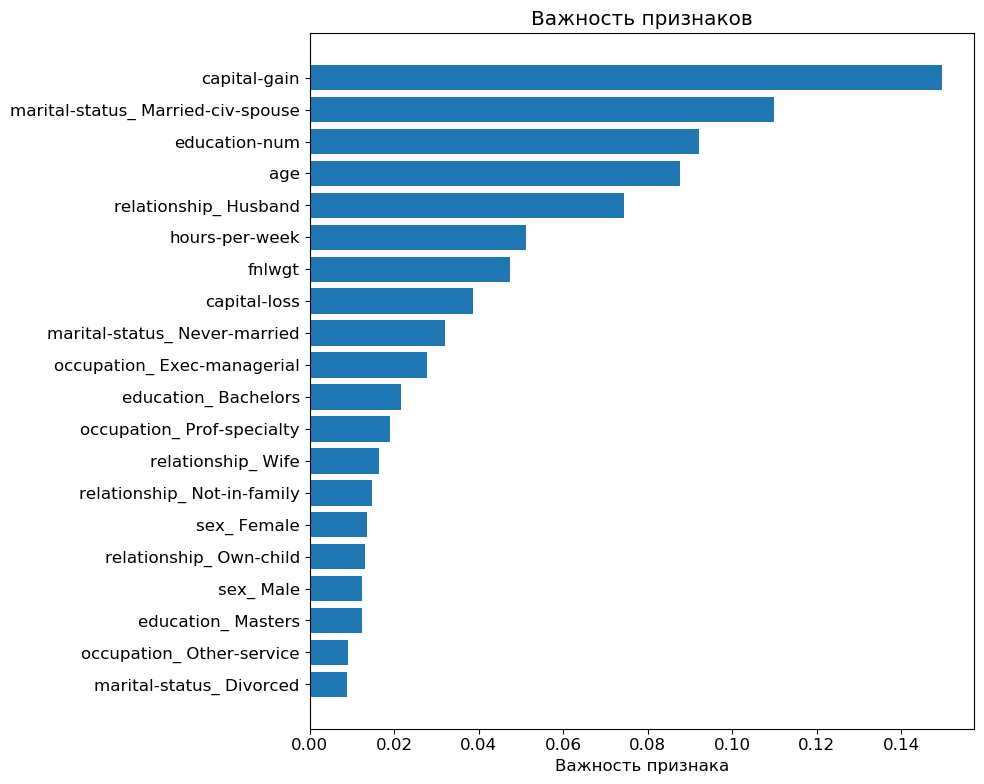

In [59]:
import matplotlib.pyplot as plt
import numpy as np

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

encoded_feature_names = encoder.get_feature_names(categorical_features)

all_feature_names = numerical_features + list(encoded_feature_names)
plt.rcParams.update({'font.size': 12})

feature_importances = optimal_rf.feature_importances_
feature_names = all_feature_names  

indices = np.argsort(feature_importances)[::-1]

top_n_features = 20

plt.figure(figsize=(10, 8))
plt.title("Важность признаков".format(top_n_features))
plt.barh(range(top_n_features), feature_importances[indices][:top_n_features], align='center')
plt.yticks(range(top_n_features), np.array(feature_names)[indices][:top_n_features])
plt.gca().invert_yaxis() 
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

### Важность признаков (исходные данные)

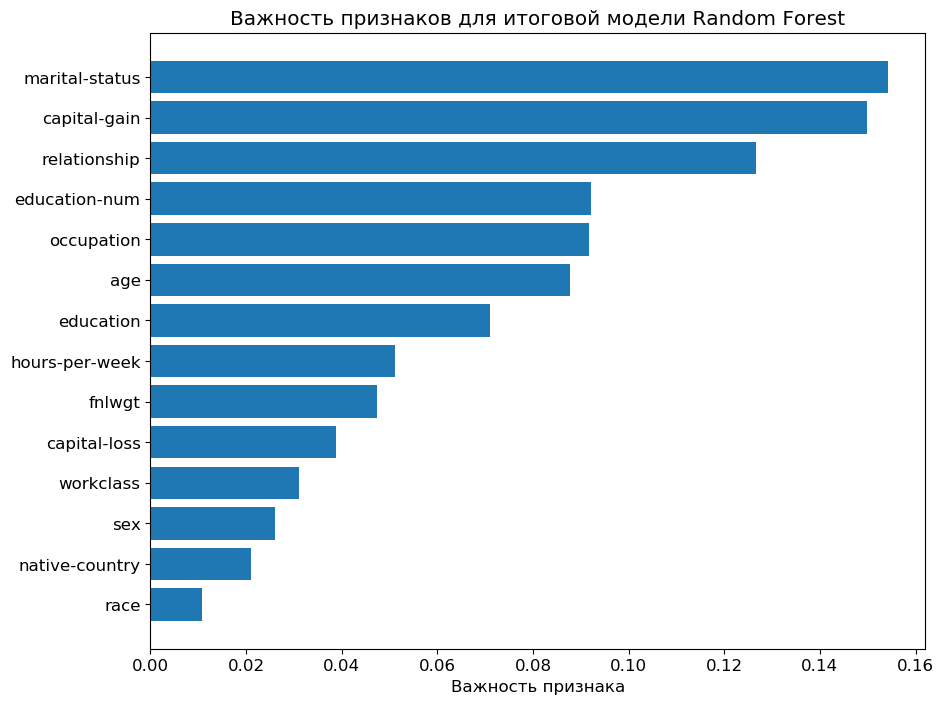

In [60]:
# Важности признаков из модели Random Forest
feature_importances = optimal_rf.feature_importances_

# Словарь для хранения важности числовых признаков
numerical_importances = {feature: importance for feature, importance in zip(numerical_features, feature_importances[:len(numerical_features)])}

# Словарь для хранения суммарной важности категориальных признаков
category_importances = {category: 0 for category in categorical_features}

# Суммирование важности признаков для каждой категории
for feature, importance in zip(encoded_feature_names, feature_importances[len(numerical_features):]):
    for category in category_importances:
        if feature.startswith(category):
            category_importances[category] += importance
            break

# Объединение словарей
total_importances = {**numerical_importances, **category_importances}

# Сортировка признаков по убыванию важности
sorted_importances = sorted(total_importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Важность признака')
plt.title('Важность признаков для итоговой модели Random Forest')
plt.gca().invert_yaxis()  
plt.show()


### ROC-кривая

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

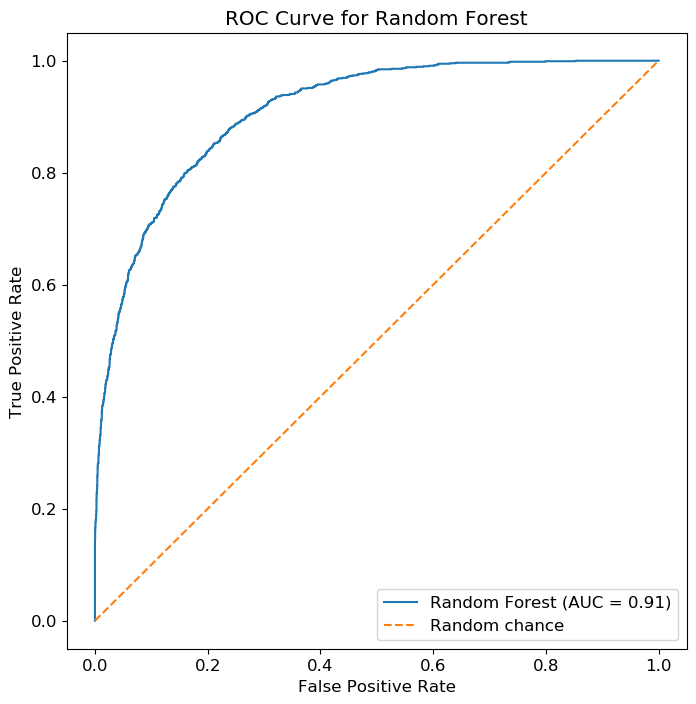

In [64]:
# Получаем вероятности класса 1
probabilities = best_model.predict_proba(X_test_processed)[:, 1]

# Вычисление TPR и FPR
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Вычисление AUC
auc_score = roc_auc_score(Y_test, probabilities)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [65]:
print(f'AUC = {round(auc_score, 2)}')

AUC = 0.91


Улучшаем результат по сравнению с KNN и Decision Tree

## Light GBM

### Оптимизация гиперпараметров

In [50]:
# Сетка поиска
from skopt.space import Real, Integer, Categorical
search_space_lgb = {
    'num_leaves': Integer(31, 150),  # количество листьев в одном дереве
    'max_depth': Integer(3, 50),  # максимальная глубина деревьев
    'learning_rate': Real(0.01, 0.2, 'log-uniform'),  # скорость обучения
    'n_estimators': Integer(10, 200),  # количество деревьев в модели
    'subsample': Real(0.5, 1.0),  # доля данных, используемых для обучения каждого дерева
    'colsample_bytree': Real(0.5, 1.0),  # доля признаков, используемых для обучения каждого дерева
}

In [51]:
from skopt import BayesSearchCV
import lightgbm as lgb

In [59]:
# Инициализация модели LightGBM
lgbm = lgb.LGBMClassifier(random_state=0)

In [91]:
# Инициализация BayesSearchCV
bayes_search_lgb = BayesSearchCV(lgbm, search_space_lgb, n_iter=200, scoring='f1', cv=5, random_state=0)

# Обучение модели
bayes_search_lgb.fit(X_train_processed, Y_train)

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[Light

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positi

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can se

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove t

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points 

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can se

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 14401, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247413 -> initscore=-1.112456
[LightGBM] [Info] Start training from score -1.112456
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [bin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247396 -> initscore=-1.112548
[LightGBM] [Info] Start training from score -1.112548
[LightGBM] [Warning] Accuracy may be bad since you did

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3563, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can se

[LightGBM] [Info] Number of positive: 3564, number of negative: 10838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 14402, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247466 -> initscore=-1.112175
[LightGBM] [Info] Start training from score -1.112175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

BayesSearchCV(cv=5, estimator=LGBMClassifier(random_state=0), n_iter=200,
              random_state=0, scoring='f1',
              search_spaces={'colsample_bytree': Real(low=0.5, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.2, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=50, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=31, high=150, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [95]:
bayes_search_lgb.best_estimator_

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.0646454387443609,
               max_depth=50, n_estimators=200, random_state=0, subsample=0.5)

In [100]:
best_score_lgbm = bayes_search_lgb.best_score_
best_params_lgbm = bayes_search_lgb.best_params_

best_model_lgbm = bayes_search_lgb.best_estimator_
test_predictions_lgbm = best_model_lgbm.predict(X_test_processed)
f1_score_test_lgbm = f1_score(Y_test, test_predictions_lgbm)

print(f"Лучший результат F1 на тренировочных данных: {best_score_lgbm}")
print(f"Лучшие гиперпараметры: {best_params_lgbm}")
print(f"F1-мера на тестовых данных: {f1_score_test_lgbm}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Лучший результат F1 на тренировочных данных: 0.7162083920473474
Лучшие гиперпараметры: OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.0646454387443609), ('max_depth', 50), ('n_estimators', 200), ('num_leaves', 31), ('subsample', 0.5)])
F1-мера на тестовых данных: 0.7135187896534895


### Изменение f1 score  в зависимости от итераций оптимизации

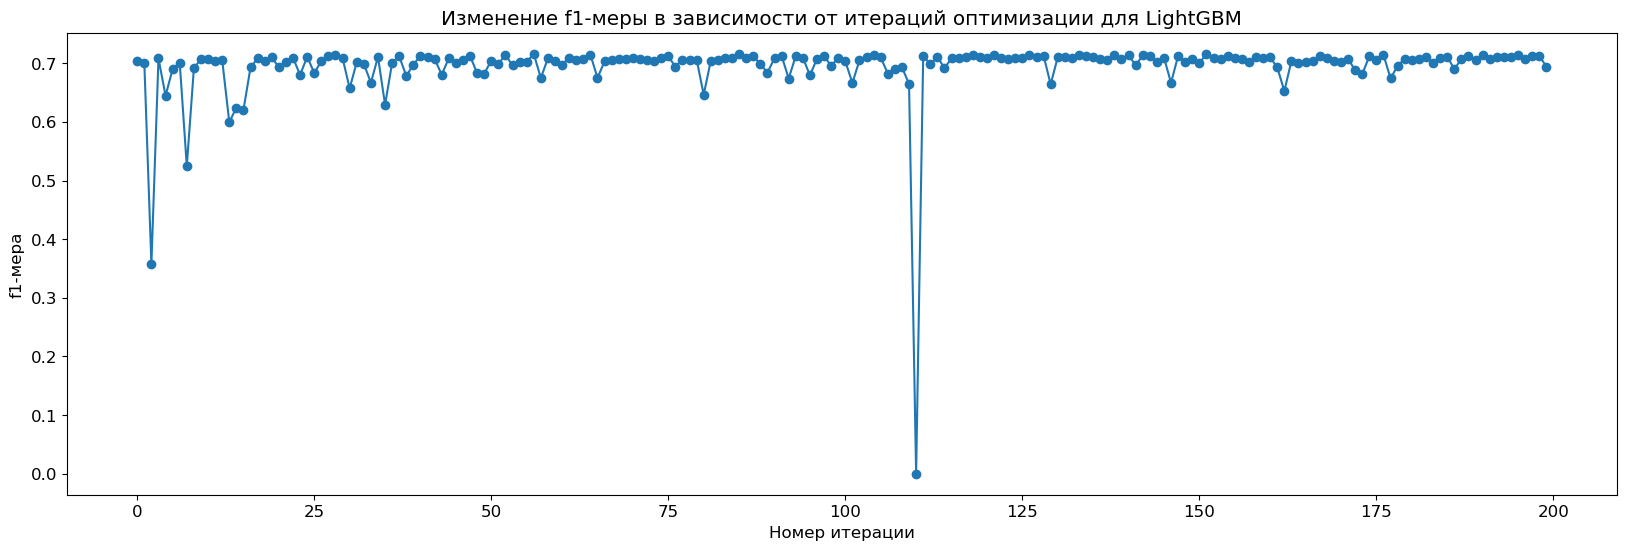

In [102]:
mean_scores_lgbm = bayes_search_lgb.cv_results_['mean_test_score']

plt.figure(figsize=(20, 6))
plt.plot(mean_scores_lgbm, marker='o')
plt.xlabel('Номер итерации')
plt.ylabel('f1-мера')
plt.title('Изменение f1-меры в зависимости от итераций оптимизации для LightGBM')
plt.show()

### Визуализация результатов байесовского поиска

In [103]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective, plot_histogram

<Figure size 1400x1400 with 0 Axes>

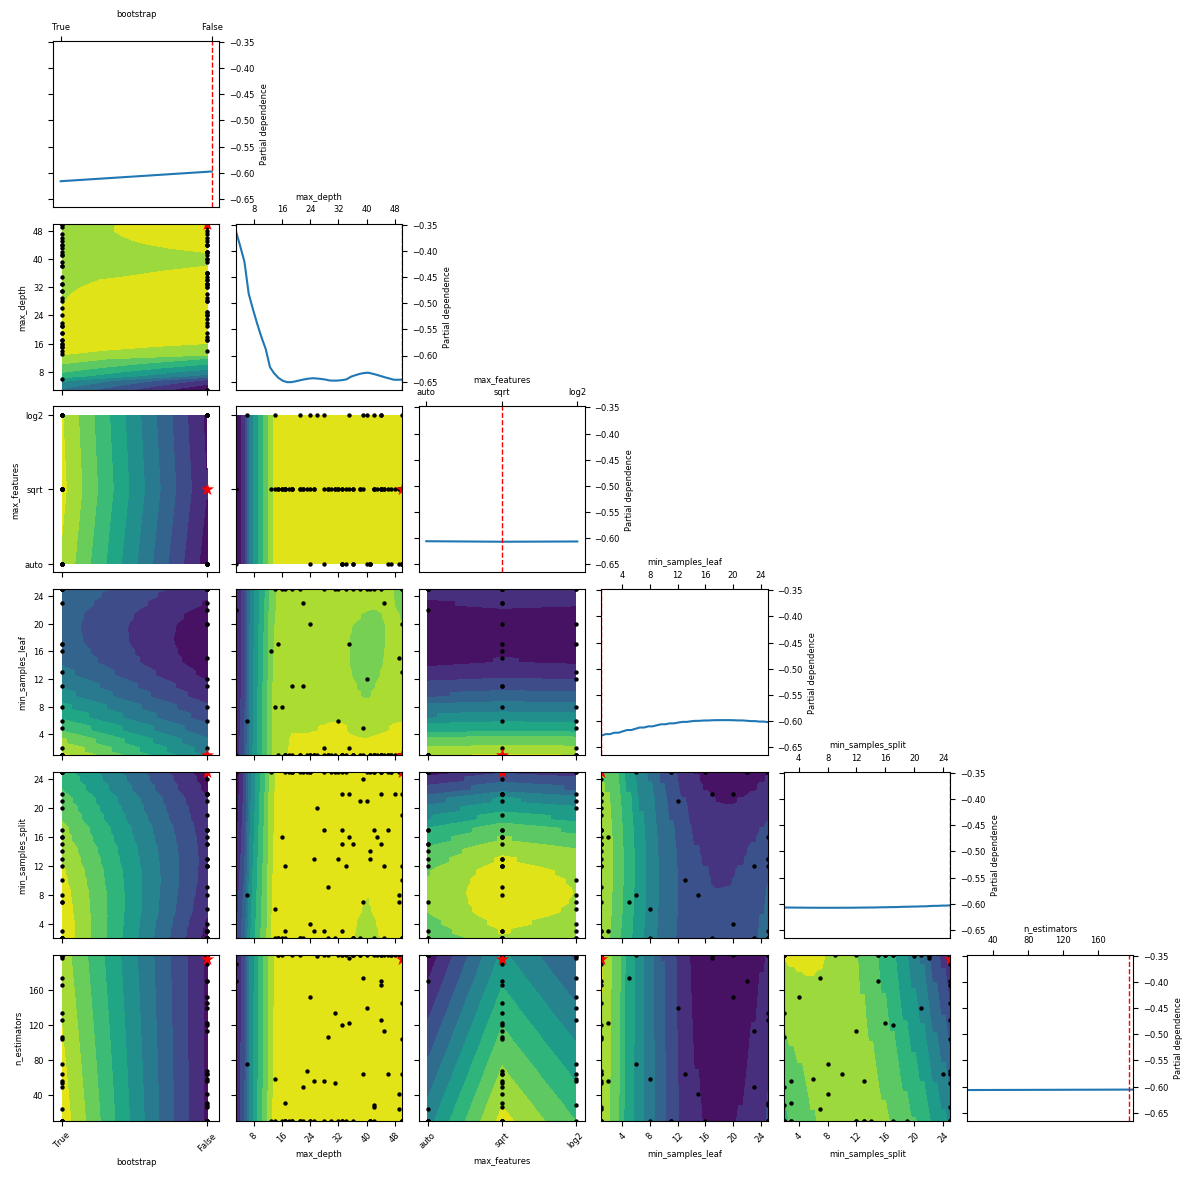

In [104]:
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 6})
plot_objective(bayes_search.optimizer_results_[0])
plt.show()

### Строим финальную модель с оптимальными параметрами

In [131]:
from lightgbm import LGBMClassifier

# Задание параметров модели
best_model_lgbm = LGBMClassifier(
    colsample_bytree=0.5,
    learning_rate=0.0646454387443609,
    max_depth=50,
    n_estimators=200,
    num_leaves=31,
    subsample=0.5
)

# Обучение модели на обучающих данных
best_model_lgbm.fit(X_train_processed, Y_train)

# Сделать предсказания на тестовых данных
test_predictions_lgbm = best_model_lgbm.predict(X_test_processed)

# Расчет предсказаний для обучающего и тестового наборов данных
train_predictions = best_model_lgbm.predict(X_train_processed)
test_predictions = best_model_lgbm.predict(X_test_processed)

# Метрики для тренировочного набора
accuracy_train = round(accuracy_score(Y_train, train_predictions), 4)
precision_train = round(precision_score(Y_train, train_predictions), 4)
recall_train = round(recall_score(Y_train, train_predictions), 4)
f1_score_train = round(f1_score(Y_train, train_predictions), 4)

# Метрики для тестового набора
accuracy_test = round(accuracy_score(Y_test, test_predictions), 4)
precision_test = round(precision_score(Y_test, test_predictions), 4)
recall_test = round(recall_score(Y_test, test_predictions), 4)
f1_score_test = round(f1_score(Y_test, test_predictions), 4)

# Вывод результатов
print("Train:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

print("\nTest:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4454, number of negative: 13548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 18002, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247417 -> initscore=-1.112436
[LightGBM] [Info] Start training from score -1.112436
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

C:\Users\whati\anaconda3\lib\site-packages\lightgbm\basic.py:1073: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')
C:\Users\whati\anaconda3\lib\site-packages\lightgbm\basic.py:1073: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')
C:\Users\whati\anaconda3\lib\site-packages\lightgbm\basic.py:1073: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


In [132]:
report_4 = classification_report(Y_test, test_predictions)

In [134]:
print(report_4)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3390
           1       0.78      0.65      0.71      1111

    accuracy                           0.87      4501
   macro avg       0.84      0.80      0.81      4501
weighted avg       0.87      0.87      0.87      4501



Как я и предпологал, бустинг выдаёт наилучший результат как по f1-score так и по Accuracy

### Confusion Matrix

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Converting data to scipy sparse matrix.


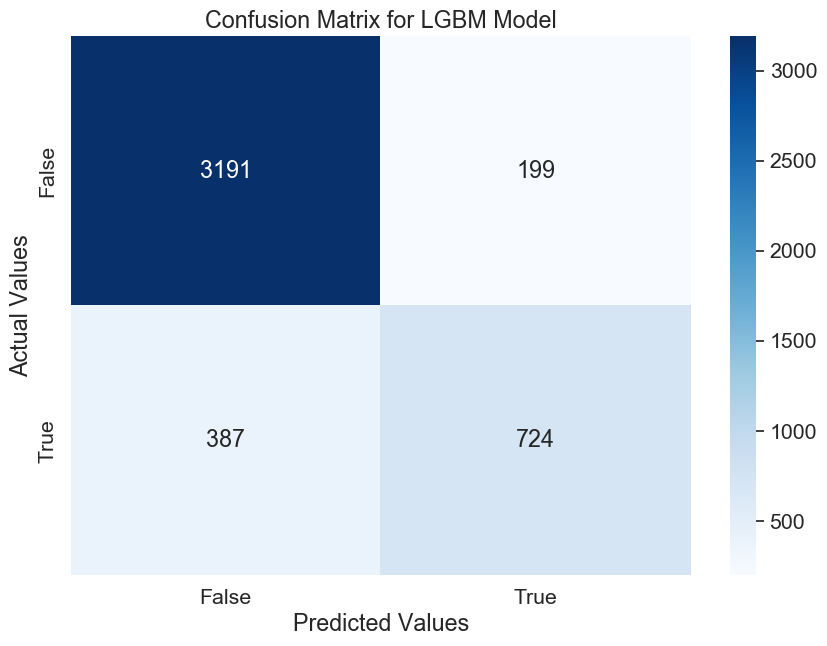

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказания модели на тестовых данных
test_predictions_lgbm = best_model_lgbm.predict(X_test_processed)

# Расчет матрицы ошибок для тестового набора данных
cf_matrix_lgbm = confusion_matrix(Y_test, test_predictions_lgbm)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Увеличение шрифта для наглядности
ax = sns.heatmap(cf_matrix_lgbm, annot=True, cmap='Blues', fmt='g')  # fmt='g' для предотвращения научной нотации

# Настройка меток осей
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix for LGBM Model')

# Настройка меток тиков
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### Важность признаков (One-hot-endcoding)

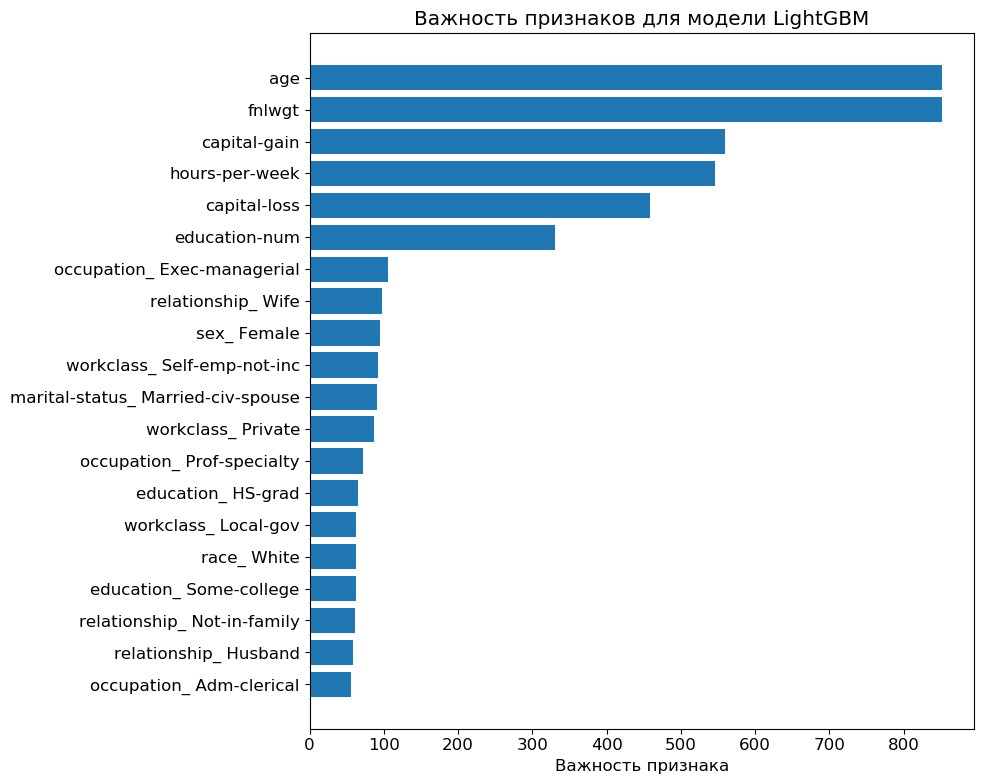

In [110]:
feature_importances_lgbm = best_model_lgbm.feature_importances_

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

encoded_feature_names_lgbm = encoder.get_feature_names(categorical_features)

all_feature_names_lgbm = numerical_features + list(encoded_feature_names_lgbm)

indices_lgbm = np.argsort(feature_importances_lgbm)[::-1]

top_n_features_lgbm = 20

plt.figure(figsize=(10, 8))
plt.title("Важность признаков для модели LightGBM")
plt.barh(range(top_n_features_lgbm), feature_importances_lgbm[indices_lgbm][:top_n_features_lgbm], align='center')
plt.yticks(range(top_n_features_lgbm), np.array(all_feature_names_lgbm)[indices_lgbm][:top_n_features_lgbm])
plt.gca().invert_yaxis()  
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

### Важность признаков (исходные данные)

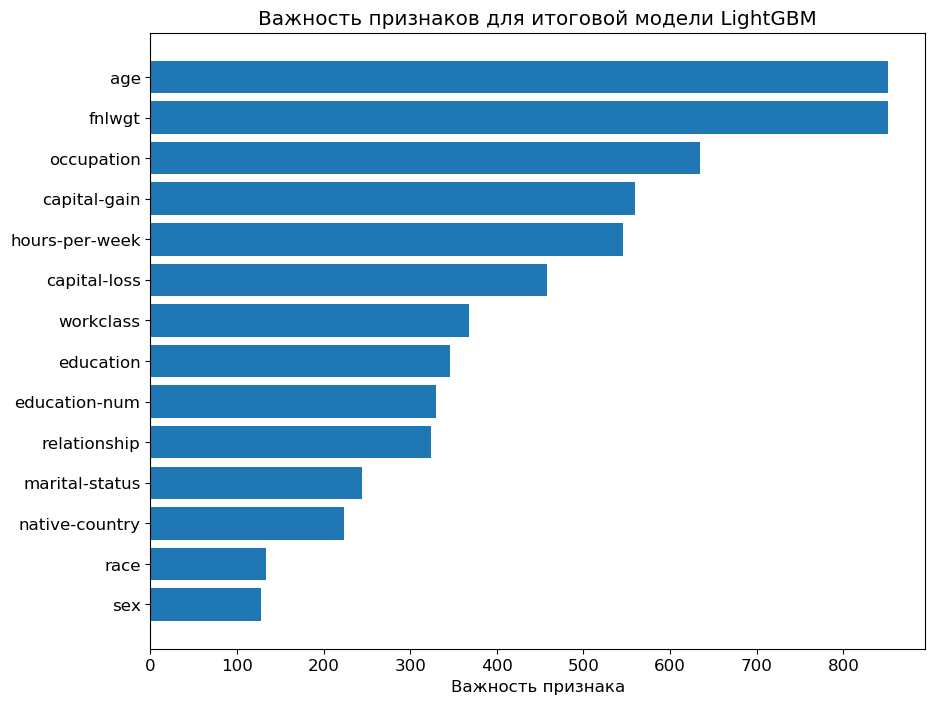

In [111]:
feature_importances_lgbm = bayes_search_lgb.best_estimator_.feature_importances_

numerical_importances_lgbm = {feature: importance for feature, importance in zip(numerical_features, feature_importances_lgbm[:len(numerical_features)])}

category_importances_lgbm = {category: 0 for category in categorical_features}

for feature, importance in zip(encoded_feature_names, feature_importances_lgbm[len(numerical_features):]):
    for category in category_importances_lgbm:
        if feature.startswith(category):
            category_importances_lgbm[category] += importance
            break

total_importances_lgbm = {**numerical_importances_lgbm, **category_importances_lgbm}

sorted_importances_lgbm = sorted(total_importances_lgbm.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_importances_lgbm], [x[1] for x in sorted_importances_lgbm])
plt.xlabel('Важность признака')
plt.title('Важность признаков для итоговой модели LightGBM')
plt.gca().invert_yaxis()  
plt.show()

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\whati\anaconda3\lib\site-packages\lightgbm\basic.py:1073: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


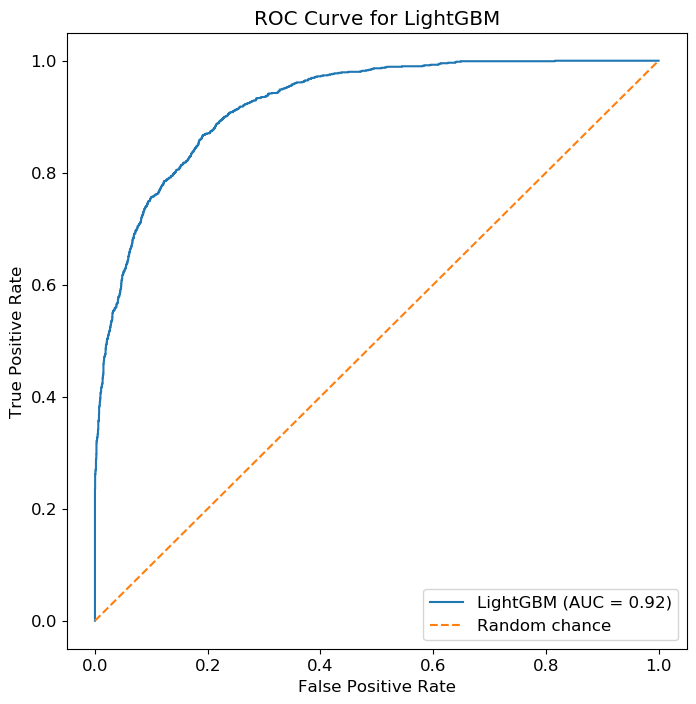

In [118]:
# Получаем вероятности класса 1
probabilities = best_model_lgbm.predict_proba(X_test_processed)[:, 1]

# Вычисление TPR и FPR
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Вычисление AUC
auc_score = roc_auc_score(Y_test, probabilities)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [117]:
print(f'AUC = {round(auc_score, 2)}')

AUC = 0.92
